# Magaza Yorumları Sementic Analysis

## Introduction
* Veriler, Türkçe olarak, çeşitli elektronik mağazalardan toplanmıştır. 
* Duygu ayrımı, "Olumlu", "Olumsuz" ve "Tarafsız" olmak üzere üçe ayrılmıştır.

1. [Import](#1)
1. [Read Data](#2)
1. [Data Information](#3)
1. [Visualization](#4)
1. [Missing Value](#5)
1. [Training](#6)
1. [Conclusion](#7)

<a id = "1"></a><b>
## Import 

In [17]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

* Bert Algorithms

In [2]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\torchaudio\backend\utils.py:67: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


<a id = "2"></a><b>
## Read Data

In [3]:
data = pd.read_csv("magaza_yorumlari_duygu_analizi.csv", encoding = "utf-16")
data = data[:3000]
data.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [4]:
gorus = data["Görüş"]
durum = data["Durum"]

<a id = "3"></a><b>
## Data Information

In [5]:
data.describe()

,Görüş,Durum
count,2999,3000
unique,2997,3
top,kullanişlı,Olumsuz
freq,2,1148


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Görüş   2999 non-null   object
 1   Durum   3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [7]:
type(data["Görüş"][5])

str

* Label Encoder

In [8]:
durum = [0 if i == "Olumsuz" else 1 if i == "Olumlu" else 2 for i in data["Durum"]]

In [9]:
durum = pd.DataFrame(data = durum, index = range(len(durum)), columns = ["Durum"])
data = pd.concat([gorus, durum], axis = 1)
data.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",0
1,hizli teslimat tesekkürler,2
2,ses olayı süper....gece çalıştır sıkıntı yok.....,1
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,0
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,0


<a id = "4"></a><b>
## Visualization

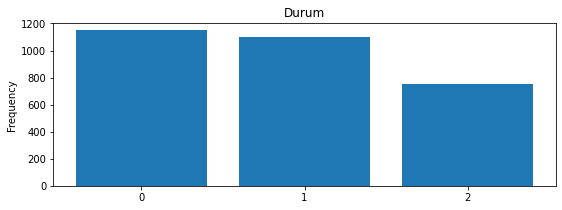

Durum: 
 0    1148
1    1097
2     754
Name: Durum, dtype: int64


In [21]:
var = data["Durum"]
    
# count number of categorical variable 
varValue = var.value_counts()
    
# visualize
plt.figure(figsize = (9, 3))
plt.bar(varValue.index, varValue)
plt.xticks(varValue.index, varValue.index.values)
plt.ylabel("Frequency")
plt.title("Durum")
plt.show()
print("{}: \n {}".format("Durum", varValue))

* Positive: 1097
* Negative: 1148
* Notr: 754

<a id = "5"></a><b>
## Missing Value

In [10]:
data.isnull().sum()
data = data.dropna().reset_index()
data.isnull().sum()

index    0
Görüş    0
Durum    0
dtype: int64

<a id = "6"></a><b>
## Training

In [11]:
sa = pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

In [12]:
sa(data["Görüş"][1])

[{'label': 'positive', 'score': 0.7957015633583069}]

In [13]:
data["Görüş"][1]

'hizli teslimat tesekkürler'

In [14]:
label_list = []
score_list = []
for d in range(len(data)):
    for i in sa(data["Görüş"][d]):
        label, score = i.values()
        label_list.append(label)
        score_list.append(score)
data["Sementic"] = pd.DataFrame(data = label_list, index = range(len(label_list)), columns = ["Sementic"])
data["Probability"] = pd.DataFrame(data = score_list, index = range(len(score_list)), columns = ["Probability"])

<a id = "7"></a><b>
## Conclusion

In [15]:
data.head()

,index,Görüş,Durum,Sementic,Probability
0,0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",0,negative,0.999512
1,1,hizli teslimat tesekkürler,2,positive,0.795702
2,2,ses olayı süper....gece çalıştır sıkıntı yok.....,1,positive,0.988502
3,3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,0,negative,0.997646
4,4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,0,negative,0.998313


* data[0] == 0 negatif olma olasılığı 0.99 
* data[1] == 2 notr olma olasılığı 0.79